In [77]:
import itertools
import matplotlib.pyplot as plt
from math import factorial
from shapely.geometry import Polygon, MultiPolygon
import networkx as nx
import random
from itertools import product
import numpy as np
import math



задача 18

In [70]:

def generate_words():
    alphabet = 'абвгдеёжзийклмнопрстуфхцчшщьыъэюя'
    forbidden_letters = 'ьъы'
    words = [''.join(word) for word in itertools.product(alphabet, repeat=3)]
    valid_words = [word for word in words if word[0] not in forbidden_letters]
    total_words = len(valid_words)
    
    return valid_words, total_words

valid_words, total_words = generate_words()
print(f"количество слов: {total_words}")


количество слов: 32670


задача 19

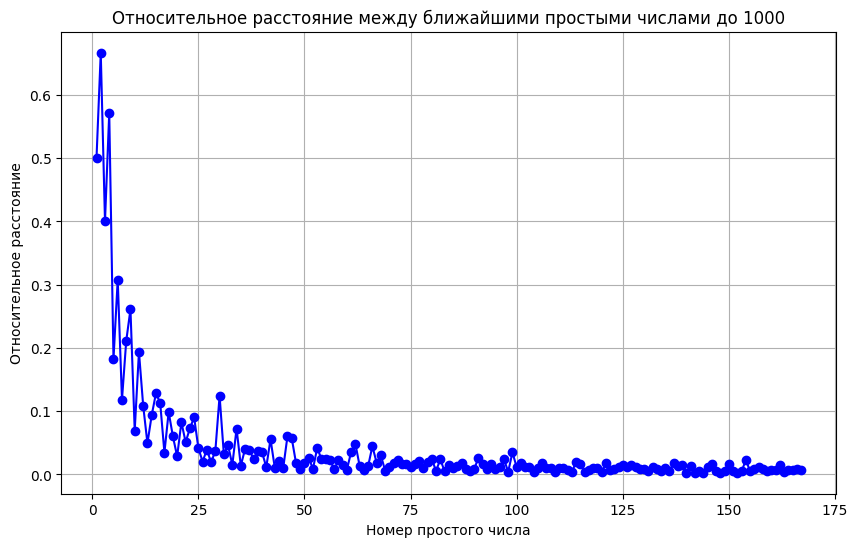

In [71]:
def sieve_of_eratosthenes(n):
    sieve = [True] * (n + 1)
    sieve[0] = sieve[1] = False  
    for start in range(2, int(n**0.5) + 1):
        if sieve[start]:
            for multiple in range(start*start, n + 1, start):
                sieve[multiple] = False
    return [num for num in range(n + 1) if sieve[num]]

def relative_distances(primes):
    distances = []
    for i in range(1, len(primes)):
        distance = primes[i] - primes[i - 1]
        relative_distance = distance / primes[i - 1]
        distances.append((primes[i - 1], primes[i], relative_distance))
    return distances

def main(N):
    primes = sieve_of_eratosthenes(N)
    distances = relative_distances(primes)
    
    prime_indices = list(range(1, len(primes)))
    
    relative_distances_list = [dist[2] for dist in distances]

    plt.figure(figsize=(10, 6))
    plt.plot(prime_indices, relative_distances_list, marker='o', linestyle='-', color='b')
    plt.title(f'Относительное расстояние между ближайшими простыми числами до {N}')
    plt.xlabel('Номер простого числа')
    plt.ylabel('Относительное расстояние')
    plt.grid(True)
    plt.show()

N = 1000
main(N)


задача 20

In [72]:

def sequence_1(x1, n):
    x = x1
    for i in range(1, n):
        x = x + 1 / factorial(i + 1)
    return x

def sequence_2(x1, n):
    x = x1
    for i in range(1, n):
        x = ((i + 1) ** 2 / ((i + 1) ** 2 - (1/6) ** 2)) * x
    return x

x1_case_1 = 2
x1_case_2 = 108 / 35
n = 5

x5_case_1 = sequence_1(x1_case_1, n)
print(f"Значение x5 1): {x5_case_1}")

x5_case_2 = sequence_2(x1_case_2, n)
print(f"Значение x5 2): {x5_case_2}")


Значение x5 1): 2.7166666666666663
Значение x5 2): 3.125806644976013


задача 21

In [10]:
A = {4, 7, 5, 9, 8}
B = {2, 9, 10, 6, 5}

union = A | B

intersection = A & B

difference_A_B = A - B

difference_B_A = B - A

symmetric_difference = A ^ B

print("Множество A:", A)
print("Множество B:", B)
print("Объединение A и B:", union)
print("Пересечение A и B:", intersection)
print("Разность A - B:", difference_A_B)
print("Разность B - A:", difference_B_A)
print("Симметричная разность A и B:", symmetric_difference)


Множество A: {4, 5, 7, 8, 9}
Множество B: {2, 5, 6, 9, 10}
Объединение A и B: {2, 4, 5, 6, 7, 8, 9, 10}
Пересечение A и B: {9, 5}
Разность A - B: {8, 4, 7}
Разность B - A: {2, 10, 6}
Симметричная разность A и B: {2, 4, 6, 7, 8, 10}


задача 22

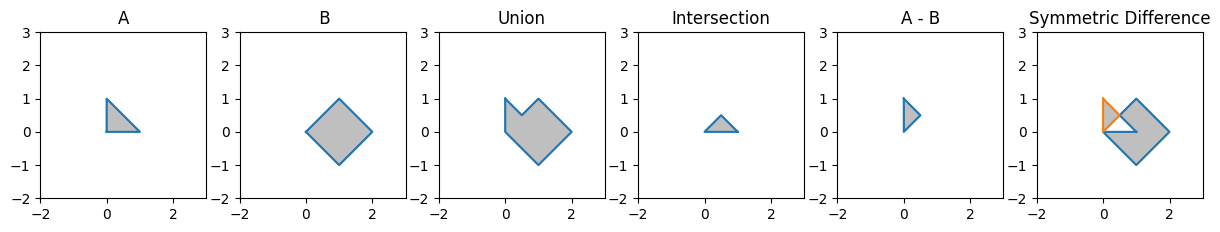

In [74]:

A = Polygon([(0, 0), (1, 0), (0, 1)])
B = Polygon([(0, 0), (1, 1), (2, 0), (1, -1)])

union = A.union(B)

intersection = A.intersection(B)

difference_A_B = A.difference(B)

difference_B_A = B.difference(A)

symmetric_difference = A.symmetric_difference(B)

def plot_polygons(polygons, titles):
    fig, axs = plt.subplots(1, len(polygons), figsize=(15, 5))
    if len(polygons) == 1:
        axs = [axs]
    for ax, poly, title in zip(axs, polygons, titles):
        ax.set_title(title)
        if isinstance(poly, (Polygon, MultiPolygon)):
            if isinstance(poly, Polygon):
                polys = [poly]
            else:
                polys = poly.geoms
            for p in polys:
                x, y = p.exterior.xy
                ax.plot(x, y)
                ax.fill(x, y, alpha=0.5, fc='gray', ec='black')
        ax.set_xlim(-2, 3)
        ax.set_ylim(-2, 3)
        ax.set_aspect('equal', 'box')
    plt.show()

polygons = [A, B, union, intersection, difference_A_B, symmetric_difference]
titles = ["A", " B", "Union", "Intersection", "A - B", "Symmetric Difference"]

plot_polygons(polygons, titles)


задача 24

In [14]:
def generate_binary_chains(length):
    chains = []
    
    def recurse(current_chain, remaining_length):
        if remaining_length == 0:
            chains.append(current_chain)
            return
        recurse(current_chain + '0', remaining_length - 1)
        recurse(current_chain + '1', remaining_length - 1)
    
    recurse('', length)
    
    return chains

all_chains = generate_binary_chains(10)

for chain in all_chains:
    print(chain)


0000000000
0000000001
0000000010
0000000011
0000000100
0000000101
0000000110
0000000111
0000001000
0000001001
0000001010
0000001011
0000001100
0000001101
0000001110
0000001111
0000010000
0000010001
0000010010
0000010011
0000010100
0000010101
0000010110
0000010111
0000011000
0000011001
0000011010
0000011011
0000011100
0000011101
0000011110
0000011111
0000100000
0000100001
0000100010
0000100011
0000100100
0000100101
0000100110
0000100111
0000101000
0000101001
0000101010
0000101011
0000101100
0000101101
0000101110
0000101111
0000110000
0000110001
0000110010
0000110011
0000110100
0000110101
0000110110
0000110111
0000111000
0000111001
0000111010
0000111011
0000111100
0000111101
0000111110
0000111111
0001000000
0001000001
0001000010
0001000011
0001000100
0001000101
0001000110
0001000111
0001001000
0001001001
0001001010
0001001011
0001001100
0001001101
0001001110
0001001111
0001010000
0001010001
0001010010
0001010011
0001010100
0001010101
0001010110
0001010111
0001011000
0001011001
0001011010

In [15]:
len(all_chains)

1024

задача 25

In [18]:


A = {"Александр", "Николай", "Светлана"}
B = {"Иван", "Денис", "Петр", "Эдуард"}
C = {"Иванов", "Петров", "Сидоров", "Фролов"}

decartes_product = list(product(A, B, C))

for element in decartes_product:
    print(" ".join(element))
print(len(decartes_product))


Александр Иван Иванов
Александр Иван Сидоров
Александр Иван Фролов
Александр Иван Петров
Александр Эдуард Иванов
Александр Эдуард Сидоров
Александр Эдуард Фролов
Александр Эдуард Петров
Александр Петр Иванов
Александр Петр Сидоров
Александр Петр Фролов
Александр Петр Петров
Александр Денис Иванов
Александр Денис Сидоров
Александр Денис Фролов
Александр Денис Петров
Светлана Иван Иванов
Светлана Иван Сидоров
Светлана Иван Фролов
Светлана Иван Петров
Светлана Эдуард Иванов
Светлана Эдуард Сидоров
Светлана Эдуард Фролов
Светлана Эдуард Петров
Светлана Петр Иванов
Светлана Петр Сидоров
Светлана Петр Фролов
Светлана Петр Петров
Светлана Денис Иванов
Светлана Денис Сидоров
Светлана Денис Фролов
Светлана Денис Петров
Николай Иван Иванов
Николай Иван Сидоров
Николай Иван Фролов
Николай Иван Петров
Николай Эдуард Иванов
Николай Эдуард Сидоров
Николай Эдуард Фролов
Николай Эдуард Петров
Николай Петр Иванов
Николай Петр Сидоров
Николай Петр Фролов
Николай Петр Петров
Николай Денис Иванов
Николай 

In [21]:
from itertools import permutations

def cyclic_permutation(s):
    return s[1:] + s[0]

elements = [''.join(p) for p in permutations('abcd')]

def generate_algebra(elements):
    algebra = set(elements)
    for element in elements:
        current = element
        while True:
            current = cyclic_permutation(current)
            if current in algebra:
                break
            algebra.add(current)
    return algebra

initial_elements = ['abcd']

generated_algebra = generate_algebra(initial_elements)

print("Элементы алгебры под действием циклической перестановки:")
for elem in sorted(generated_algebra):
    print(elem)

print(f"Всего элементов в алгебре: {len(generated_algebra)}")

def find_generators(elements):
    for element in elements:
        if generate_algebra([element]) == set(elements):
            return [element]
    return []

generators = find_generators(elements)

print("Система образующих алгебры:")
for gen in generators:
    print(gen, 'p')


Элементы алгебры под действием циклической перестановки:
abcd
bcda
cdab
dabc
Всего элементов в алгебре: 4
Система образующих алгебры:


задача 26

In [26]:
def add_mod_4(n, m):
    return (n + m) % 4

def custom_add(n, m):
    return (3 * n + 5 * m) % 4

def is_endomorphism(f):
    for a in range(4):
        for b in range(4):
            if f(add_mod_4(a, b)) != add_mod_4(f(a), f(b)):
                return False
            if f(custom_add(a, b)) != custom_add(f(a), f(b)):
                return False
    return True

endomorphisms = []

for f0 in range(4):
    for f1 in range(4):
        for f2 in range(4):
            for f3 in range(4):
                f = [f0, f1, f2, f3]
                f_map = lambda x: f[x]
                if is_endomorphism(f_map):
                    endomorphisms.append(f)

print("Эндоморфизмы пары алгебр Z4 и Z'4:")
for f in endomorphisms:
    print(f)


Эндоморфизмы пары алгебр Z4 и Z'4:
[0, 0, 0, 0]
[0, 1, 2, 3]
[0, 2, 0, 2]
[0, 3, 2, 1]


задача 28

In [25]:
def operation(i, j):
    return 1 + ((i - 1) * (j - 1)) % 33

def is_associative():
    for i in range(1, 34):
        for j in range(1, 34):
            for k in range(1, 34):
                if operation(operation(i, j), k) != operation(i, operation(j, k)):
                    return False
    return True

def find_identity_element():
    for e in range(1, 34):
        is_identity = True
        for x in range(1, 34):
            if operation(x, e) != x or operation(e, x) != x:
                is_identity = False
                break
        if is_identity:
            return e
    return None

is_monoid = is_associative()
identity_element = find_identity_element()

print(f"Алгебра ассоциативна: {is_monoid}")
if identity_element:
    print(f"Единичный элемент: {identity_element}")
else:
    print("Единичного элемента нет")

Алгебра ассоциативна: True
Единичный элемент: 2


задача 32 (?)


Для доказательства того, что алгебра $\mathbb{Q} + \sqrt{2}\mathbb{Q}; +, \times$ является полем, необходимо проверить следующие свойства поля:

1. Существование нейтрального элемента относительно операции сложения (нуля).
2. Существование противоположного элемента для каждого элемента относительно операции сложения (отрицательного числа).
3. Существование нейтрального элемента относительно операции умножения (единицы).
4. Ассоциативность операции сложения.
5. Дистрибутивность умножения относительно сложения.
6. Существование обратного элемента для каждого ненулевого элемента относительно операции умножения.

Давайте проверим эти свойства:

1. В множестве рациональных чисел $\mathbb{Q}$ существует нулевой элемент, который является нейтральным элементом относительно сложения. Следовательно, $\mathbb{Q} + \sqrt{2}\mathbb{Q}$ также имеет нулевой элемент.

2. Для любого $a \in \mathbb{Q}$, $-a \in \mathbb{Q}$, поэтому $-a \in \mathbb{Q} + \sqrt{2}\mathbb{Q}$. Таким образом, каждый элемент в $\mathbb{Q} + \sqrt{2}\mathbb{Q}$ имеет противоположный элемент.

3. В множестве рациональных чисел $\mathbb{Q}$ существует единичный элемент, который является нейтральным элементом относительно умножения. Следовательно, $\mathbb{Q} + \sqrt{2}\mathbb{Q}$ также имеет единичный элемент.

4. Операция сложения в $\mathbb{Q}$ ассоциативна, следовательно, она ассоциативна и в $\mathbb{Q} + \sqrt{2}\mathbb{Q}$.

5. Умножение дистрибутивно относительно сложения в $\mathbb{Q}$, следовательно, оно дистрибутивно и в $\mathbb{Q} + \sqrt{2}\mathbb{Q}$.

6. Для любого ненулевого $a \in \mathbb{Q}$, существует обратный элемент $\frac{1}{a} \in \mathbb{Q}$, поэтому $\frac{1}{a} \in \mathbb{Q} + \sqrt{2}\mathbb{Q}$. Таким образом, каждый ненулевой элемент в $\mathbb{Q} + \sqrt{2}\mathbb{Q}$ имеет обратный элемент.

Таким образом, алгебра $\mathbb{Q} + \sqrt{2}\mathbb{Q}; +, \times$ удовлетворяет всем аксиомам поля, и мы можем сделать вывод, что она является полем.

задача 33

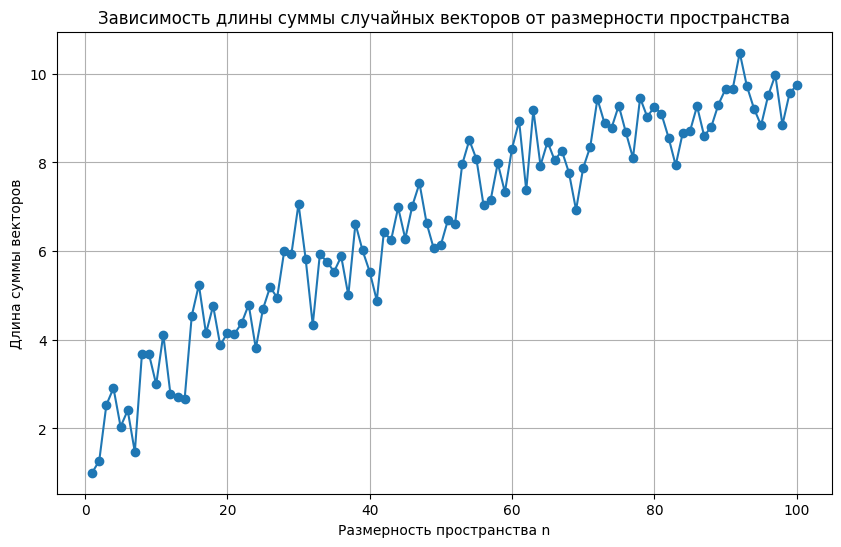

In [27]:

def generate_unit_vector(n):
 
    vec = np.random.normal(size=n)
    vec /= np.linalg.norm(vec)
    return vec

def compute_sum_of_vectors(n):

    vectors = np.array([generate_unit_vector(n) for _ in range(n)])
    sum_vector = np.sum(vectors, axis=0)
    return np.linalg.norm(sum_vector)

n_values = range(1, 101)

sum_lengths = [compute_sum_of_vectors(n) for n in n_values]

plt.figure(figsize=(10, 6))
plt.plot(n_values, sum_lengths, marker='o')
plt.xlabel('Размерность пространства n')
plt.ylabel('Длина суммы векторов')
plt.title('Зависимость длины суммы случайных векторов от размерности пространства')
plt.grid(True)
plt.show()


задача 19

In [28]:

def AND(a, b):
    return a and b

def OR(a, b):
    return a or b

def NOT(a):
    return not a

def NOR(a, b):
    return NOT(OR(a, b))

def NAND(a, b):
    return NOT(AND(a, b))

def IMPLIES(a, b):
    return OR(NOT(a), b)

def f(x, y, z, u):
    term1 = AND(x, NOR(y, z))
    term2 = IMPLIES(AND(x, u), OR(y, z))
    term3 = AND(AND(NOT(x), z), NOT(u))
    return OR(OR(term1, term2), term3)

combinations = list(itertools.product([0, 1], repeat=4))

print(f"{'x':<2} {'y':<2} {'z':<2} {'u':<2} {'f(x, y, z, u)':<15}")
for (x, y, z, u) in combinations:
    result = f(x, y, z, u)
    print(f"{x:<2} {y:<2} {z:<2} {u:<2} {result:<15}")



x  y  z  u  f(x, y, z, u)  
0  0  0  0  1              
0  0  0  1  1              
0  0  1  0  1              
0  0  1  1  1              
0  1  0  0  1              
0  1  0  1  1              
0  1  1  0  1              
0  1  1  1  1              
1  0  0  0  1              
1  0  0  1  1              
1  0  1  0  1              
1  0  1  1  1              
1  1  0  0  1              
1  1  0  1  1              
1  1  1  0  1              
1  1  1  1  1              


задача 21

In [29]:
def NOR(x, y):
    return not (x or y)

def f(x, y):
    return NOR(x, y)

def check_functional_equation(x, y):
    left_side = f(x, f(x, y))
    right_side = f(x, not y)
    return left_side == right_side

combinations = [(x, y) for x in [False, True] for y in [False, True]]

for (x, y) in combinations:
    result = check_functional_equation(x, y)
    print(f"x={x}, y={y}, f(x, f(x, y)) = f(x, not y) -> {result}")


x=False, y=False, f(x, f(x, y)) = f(x, not y) -> True
x=False, y=True, f(x, f(x, y)) = f(x, not y) -> True
x=True, y=False, f(x, f(x, y)) = f(x, not y) -> True
x=True, y=True, f(x, f(x, y)) = f(x, not y) -> True


Вывод - выполняется для всех возможных x, y

задача 22

In [32]:

def AND(a, b):
    return a and b

def OR(a, b):
    return a or b

def NOT(a):
    return not a

def NOR(a, b):
    return NOT(OR(a, b))

def IMPLIES(a, b):
    return OR(NOT(a), b)

# Уравнение 1: x = 1 + 2x ∧ y 
def solve_equation_1():
    solutions = []
    for x in [False, True]:
        for y in [False, True]:
            if x == OR(True, AND(x, y)):
                solutions.append((x, y))
    return solutions

# Уравнение 2: x | y = x ↓ y
def solve_equation_2():
    solutions = []
    for x in [False, True]:
        for y in [False, True]:
            if OR(x, y) == NOR(x, y):
                solutions.append((x, y))
    return solutions

# Уравнение 3: x ⇒ y = z ⇒ y
def solve_equation_3():
    solutions = []
    for x in [False, True]:
        for y in [False, True]:
            for z in [False, True]:
                if IMPLIES(x, y) == IMPLIES(z, y):
                    solutions.append((x, y, z))
    return solutions

solutions_1 = solve_equation_1()
solutions_2 = solve_equation_2()
solutions_3 = solve_equation_3()

print("Решения для уравнения 1 (x = 1 OR (x AND y)):")
for sol in solutions_1:
    print(f"x={sol[0]}, y={sol[1]}")

print("\nРешения для уравнения 2 (x | y = x ↓ y):")
for sol in solutions_2:
    print(f"x={sol[0]}, y={sol[1]}")

print("\nРешения для уравнения 3 (x ⇒ y = z ⇒ y):")
for sol in solutions_3:
    print(f"x={sol[0]}, y={sol[1]}, z={sol[2]}")


Решения для уравнения 1 (x = 1 OR (x AND y)):
x=True, y=False
x=True, y=True

Решения для уравнения 2 (x | y = x ↓ y):

Решения для уравнения 3 (x ⇒ y = z ⇒ y):
x=False, y=False, z=False
x=False, y=True, z=False
x=False, y=True, z=True
x=True, y=False, z=True
x=True, y=True, z=False
x=True, y=True, z=True


In [33]:

values = [0, 1, 2]
functions = list(itertools.product(values, repeat=3))

print("Все возможные функции одной переменной в трехзначной логике:")
for i, func in enumerate(functions):
    print(f"Функция {i + 1}: f(0)={func[0]}, f(1)={func[1]}, f(2)={func[2]}")


Все возможные функции одной переменной в трехзначной логике:
Функция 1: f(0)=0, f(1)=0, f(2)=0
Функция 2: f(0)=0, f(1)=0, f(2)=1
Функция 3: f(0)=0, f(1)=0, f(2)=2
Функция 4: f(0)=0, f(1)=1, f(2)=0
Функция 5: f(0)=0, f(1)=1, f(2)=1
Функция 6: f(0)=0, f(1)=1, f(2)=2
Функция 7: f(0)=0, f(1)=2, f(2)=0
Функция 8: f(0)=0, f(1)=2, f(2)=1
Функция 9: f(0)=0, f(1)=2, f(2)=2
Функция 10: f(0)=1, f(1)=0, f(2)=0
Функция 11: f(0)=1, f(1)=0, f(2)=1
Функция 12: f(0)=1, f(1)=0, f(2)=2
Функция 13: f(0)=1, f(1)=1, f(2)=0
Функция 14: f(0)=1, f(1)=1, f(2)=1
Функция 15: f(0)=1, f(1)=1, f(2)=2
Функция 16: f(0)=1, f(1)=2, f(2)=0
Функция 17: f(0)=1, f(1)=2, f(2)=1
Функция 18: f(0)=1, f(1)=2, f(2)=2
Функция 19: f(0)=2, f(1)=0, f(2)=0
Функция 20: f(0)=2, f(1)=0, f(2)=1
Функция 21: f(0)=2, f(1)=0, f(2)=2
Функция 22: f(0)=2, f(1)=1, f(2)=0
Функция 23: f(0)=2, f(1)=1, f(2)=1
Функция 24: f(0)=2, f(1)=1, f(2)=2
Функция 25: f(0)=2, f(1)=2, f(2)=0
Функция 26: f(0)=2, f(1)=2, f(2)=1
Функция 27: f(0)=2, f(1)=2, f(2)=2


задача 24

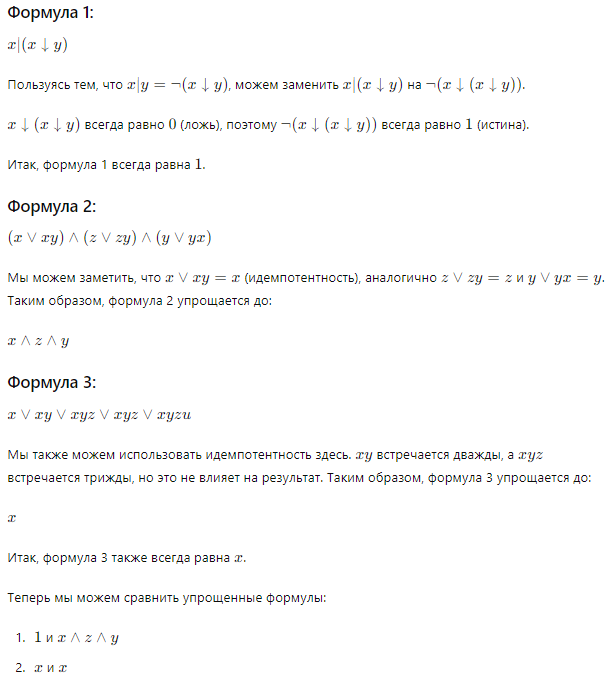

задача 18

In [55]:

result = math.factorial(32) / ((math.factorial(10))**3 * 2)
print(result)



2753294408504640.0


задача 27

In [56]:

types_of_cakes = ['наполеоны', 'эклеры', 'песочные', 'картошка']

number_of_cakes = 10

combinations = itertools.combinations_with_replacement(types_of_cakes, number_of_cakes)

combinations_list = list(combinations)

print(f"Число способов покупки 10 пирожных из 4 сортов: {len(combinations_list)}")
for combination in combinations_list:
    print(combination)


Число способов покупки 10 пирожных из 4 сортов: 286
('наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны')
('наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'эклеры')
('наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'песочные')
('наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'картошка')
('наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'эклеры', 'эклеры')
('наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'эклеры', 'песочные')
('наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'наполеоны', 'эклеры', 'картошка')
('наполеоны', 'наполеоны', 'наполеоны', 'наполеоны

задача 29

In [59]:
def find_binomial_term(a, b, n, k):
    binomial_coefficient = math.comb(n, k)
    # T_k = C(n, k) * a^(n-k) * b^k
    term = binomial_coefficient * (a ** (n - k)) * (b ** k)
    return term


a = 1  
b = 1  
n = 27 
k = 14 

term_15 = find_binomial_term(a, b, n, k)
print(f"15-е слагаемое в разложении бинома Ньютона (a + b)^{n}: {term_15}")


15-е слагаемое в разложении бинома Ньютона (a + b)^27: 20058300


In [63]:

n = 1000
prices = [random.randint(1, 10000) for _ in range(n)]

prices.sort()

result = []
for i in range(n - 2):
    # print('ok')
    for j in range(i + 1, n - 1):
        for k in range(j + 1, n):
            if prices[i] + prices[j] + prices[k] == 1500:
                result.append((prices[i], prices[j], prices[k]))

print(f"Количество найденных комплектов: {len(result)}")
for triplet in result:
    print(triplet)


Количество найденных комплектов: 175
(17, 98, 1385)
(17, 258, 1225)
(17, 289, 1194)
(17, 316, 1167)
(17, 404, 1079)
(17, 404, 1079)
(17, 416, 1067)
(17, 579, 904)
(17, 669, 814)
(17, 729, 754)
(20, 161, 1319)
(20, 292, 1188)
(20, 300, 1180)
(20, 334, 1146)
(20, 378, 1102)
(20, 413, 1067)
(20, 463, 1017)
(24, 428, 1048)
(24, 601, 875)
(25, 78, 1397)
(25, 719, 756)
(25, 729, 746)
(39, 169, 1292)
(39, 254, 1207)
(39, 413, 1048)
(52, 153, 1295)
(52, 179, 1269)
(52, 241, 1207)
(52, 244, 1204)
(52, 254, 1194)
(52, 420, 1028)
(52, 470, 978)
(52, 561, 887)
(52, 704, 744)
(52, 719, 729)
(77, 106, 1317)
(77, 395, 1028)
(77, 472, 951)
(77, 569, 854)
(77, 669, 754)
(77, 704, 719)
(78, 153, 1269)
(78, 215, 1207)
(78, 331, 1091)
(78, 395, 1027)
(78, 405, 1017)
(78, 601, 821)
(78, 601, 821)
(78, 648, 774)
(98, 300, 1102)
(98, 637, 765)
(98, 648, 754)
(106, 169, 1225)
(106, 240, 1154)
(106, 292, 1102)
(106, 416, 978)
(106, 496, 898)
(106, 499, 895)
(106, 517, 877)
(106, 638, 756)
(106, 648, 746)
(153,

задача 30

In [69]:

def newton_coefficient(n, k_values):
    m = len(k_values)
    total_degree = sum(k_values)
    coefficient = math.factorial(n) // math.prod(math.factorial(k) for k in k_values)
    return coefficient

n = 6
k_values = [2, 3, 1]

coefficient = newton_coefficient(n, k_values)

print(f"Коэффициент перед степенью a1^2 * a2^3 * a3 в биноме Ньютона выражения (a1 + a2 + a3)^6: {coefficient}")


Коэффициент перед степенью a1^2 * a2^3 * a3 в биноме Ньютона выражения (a1 + a2 + a3)^6: 60


задача 33

In [68]:

def derangement(n):
    return math.factorial(n) * sum((-1)**i / math.factorial(i) for i in range(n + 1))

def fixed_and_deranged(n, k):
    deranged_n_minus_k = derangement(n - k)
    return math.comb(n, k) * deranged_n_minus_k

n = 9
k = 5

result = fixed_and_deranged(n, k)

print(f"Количество перестановок, где {k} предметов находятся на своих местах, а {n - k} — на чужих: {result}")


Количество перестановок, где 5 предметов находятся на своих местах, а 4 — на чужих: 1134.0000000000002


задача 24

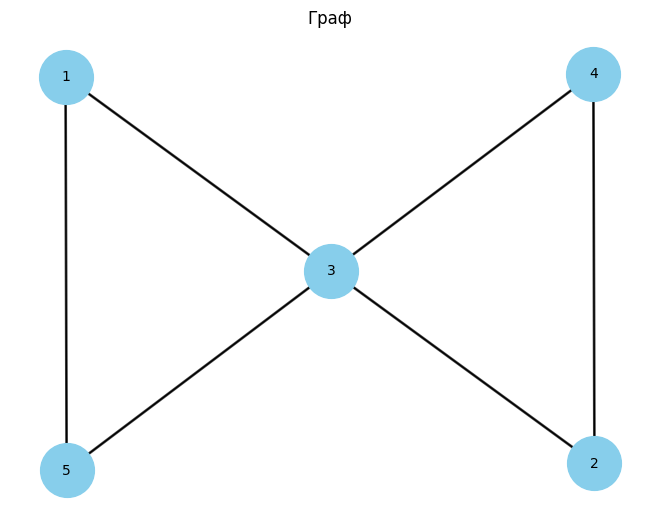

In [34]:


G = nx.Graph()


vertices = [1, 2, 3, 4, 5]
G.add_nodes_from(vertices)


edges = [(1, 3), (1, 5), (2, 3), (2, 4), (3, 4), (3, 5)]
G.add_edges_from(edges)


pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10)  
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, alpha=0.7, edge_color='black')  


plt.title("Граф")
plt.axis('off')  
plt.show()


задача 25

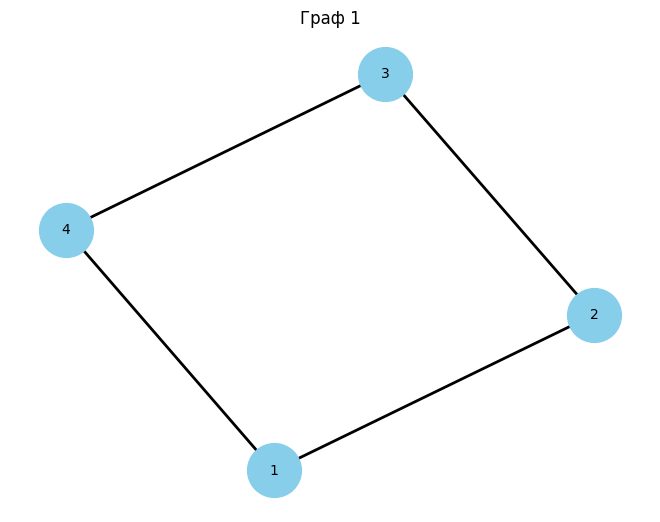

In [35]:

G1 = nx.Graph()

vertices1 = [1, 2, 3, 4]
G1.add_nodes_from(vertices1)

edges1 = [(1, 2), (2, 3), (3, 4), (4, 1)]
G1.add_edges_from(edges1)


nx.draw(G1, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, edge_color='black', width=2)


plt.title("Граф 1")
plt.show()


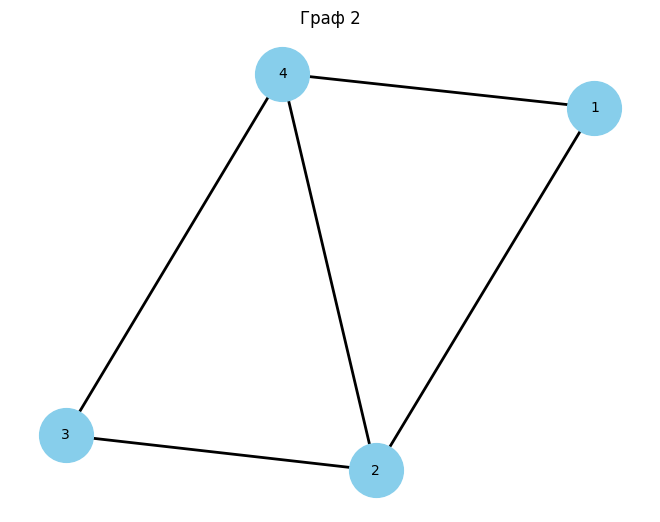

In [36]:
G2 = nx.Graph()

vertices2 = [1, 2, 3, 4]
G2.add_nodes_from(vertices2)

edges2 = [(1, 2), (2, 4), (2, 3), (3, 4), (4, 1)]
G2.add_edges_from(edges2)

nx.draw(G2, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, edge_color='black', width=2)

plt.title("Граф 2")
plt.show()


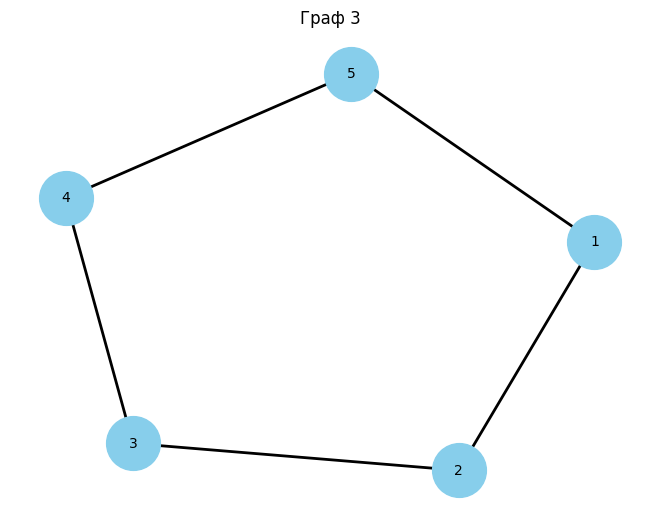

In [37]:
G3 = nx.Graph()

vertices3 = [1, 2, 3, 4, 5]
G3.add_nodes_from(vertices3)

edges3 = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 5)]
G3.add_edges_from(edges3)

nx.draw(G3, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, edge_color='black', width=2)

plt.title("Граф 3")
plt.show()


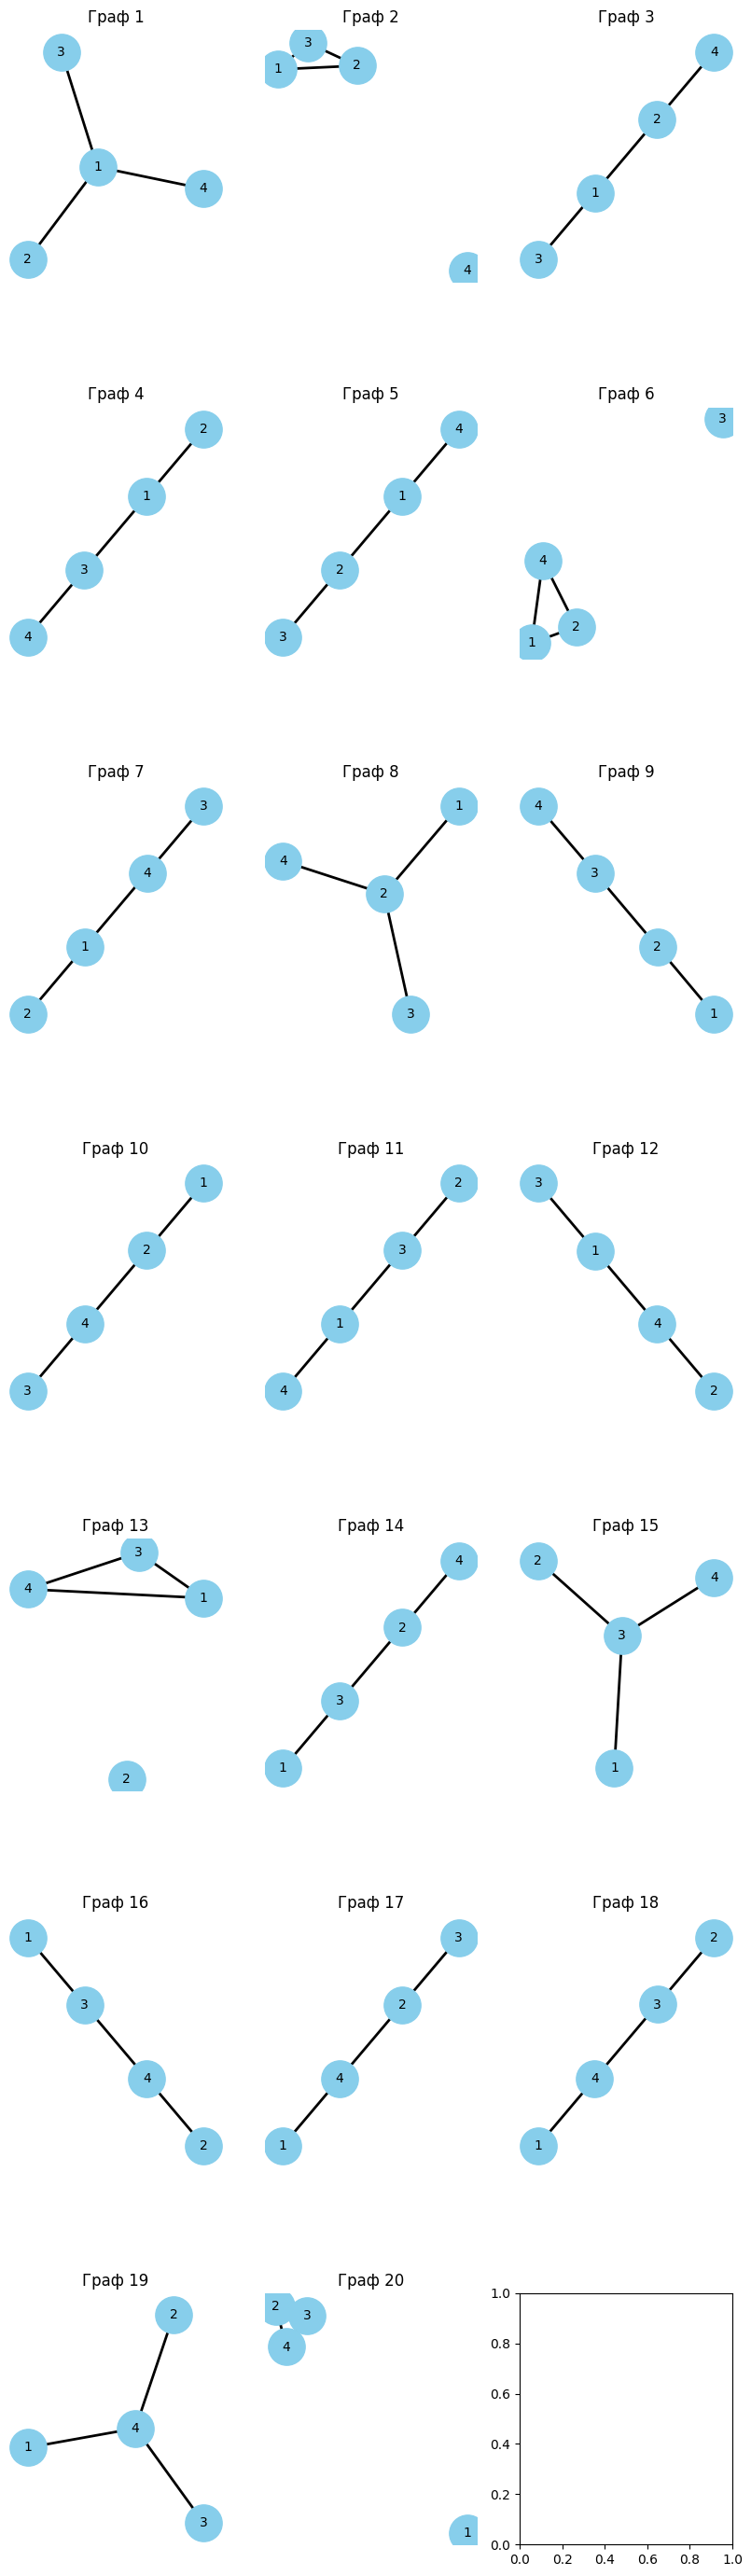

In [40]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

def generate_graphs():
    vertices = [1, 2, 3, 4]
    
    edges_combinations = list(itertools.combinations(vertices, 2))
    
    graphs = []
    
    for edge_combination in itertools.combinations(edges_combinations, 3):
        G = nx.Graph()
        G.add_nodes_from(vertices)
        G.add_edges_from(edge_combination)
        graphs.append(G)
    
    return graphs

def draw_graphs(graphs):
    num_graphs = len(graphs)
    num_rows = (num_graphs + 2) // 3
    fig, axes = plt.subplots(num_rows, 3, figsize=(10, 5*num_rows))
    plt.subplots_adjust(hspace=0.5)

    for i, G in enumerate(graphs):
        row = i // 3
        col = i % 3
        ax = axes[row, col] if num_rows > 1 else axes[col]
        nx.draw(G, with_labels=True, ax=ax, node_color='skyblue', node_size=800, font_size=10, edge_color='black', width=2)
        ax.set_title(f"Граф {i + 1}")

    plt.show()

graphs = generate_graphs()

draw_graphs(graphs)


Изоморфных из них 3 штуки !!!

задача 28

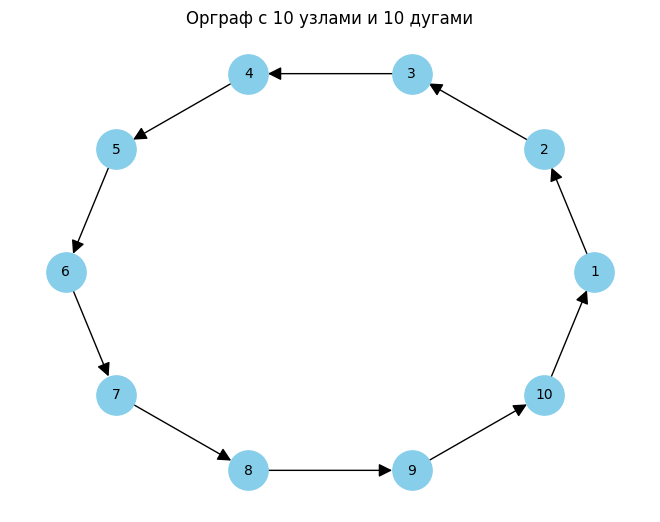

In [41]:

def build_graph(n):
    G = nx.DiGraph()
    
    nodes = range(1, n + 1)
    G.add_nodes_from(nodes)
    
    edges = [(i, i % n + 1) for i in range(1, n + 1)]
    G.add_edges_from(edges)
    
    return G

def draw_graph(G):
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, font_size=10, edge_color='black', arrowsize=20, arrows=True)
    
    plt.title(f"Орграф с {len(G.nodes)} узлами и {len(G.edges)} дугами")
    plt.show()

n = 10

G = build_graph(n)
draw_graph(G)


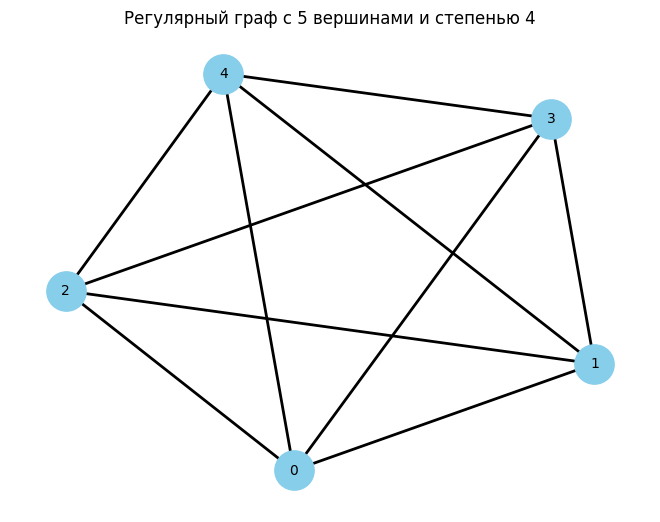

In [43]:

n = 5

G = nx.random_regular_graph(4, n)

nx.draw(G, with_labels=True, node_color='skyblue', node_size=800, font_size=10, edge_color='black', width=2)

plt.title(f"Регулярный граф с {n} вершинами и степенью 4")
plt.show()


задача 

In [45]:
def is_graph_possible(degrees):
    return sum(degrees) % 2 == 0

degrees_list = [
    [1, 2, 2, 3],
    [2, 2, 2, 2],
    [1, 1, 3, 3]
]

for i, degrees in enumerate(degrees_list, start=1):
    possible = is_graph_possible(degrees)
    if possible:
        print(f"Граф {i}: Да, возможен граф с последовательностью степеней вершин {degrees}")
    else:
        print(f"Граф {i}: Нет, невозможен граф с последовательностью степеней вершин {degrees}")


Граф 1: Да, возможен граф с последовательностью степеней вершин [1, 2, 2, 3]
Граф 2: Да, возможен граф с последовательностью степеней вершин [2, 2, 2, 2]
Граф 3: Да, возможен граф с последовательностью степеней вершин [1, 1, 3, 3]
